In [1]:
# TASK 06A: TRAIN & EVALUATE MULTI-CLASS XGBOOST

import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load datasets
X_train = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_train.csv")
X_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_test.csv")
y_train = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_train.csv").squeeze()
y_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_test.csv").squeeze()

# Initialize XGBoost model for multi-class classification
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=18,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print("✅ XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save model
model_path = r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\xgboost_model.pkl"
joblib.dump(xgb_model, model_path)
print(f"\n📁 Trained XGBoost model saved to: {model_path}")


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:30:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29403
           1       0.36      0.36      0.36       901
           2       0.34      0.47      0.39      1055
           3       0.68      0.62      0.65      1205
           4       0.33      0.17      0.22         6
           5       0.81      0.80      0.81      2515
           6       0.57      0.42      0.48       682
           7       0.35      0.42      0.38       778
           8       0.44      0.34      0.38       483
           9       0.37      0.34      0.35       688
          10       0.33      0.31      0.32       492
          11       0.42      0.34      0.38       476
          12       0.62      0.32      0.42        94
          13       0.39      0.31      0.35       522
          14       0.92      0.89      0.90      1516
          15       0.34      0.26      0.29       427
          16       0.39      0.38      0.38    

In [2]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import pandas as pd

# Load test data and predictions (if not already in memory)
y_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_test.csv").squeeze()
X_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_test.csv")

import joblib
xgb_model = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\xgboost_model.pkl")
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)

# Binarize labels for ROC-AUC
n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
roc_auc_macro = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
roc_auc_micro = roc_auc_score(y_test_bin, y_prob, average='micro', multi_class='ovr')

# Display summary
summary_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 'ROC-AUC (Macro)', 'ROC-AUC (Micro)'],
    'Value': [acc, prec, rec, f1, roc_auc_macro, roc_auc_micro]
})

print("✅ XGBoost Evaluation Summary (Multi-class):")
display(summary_df)


✅ XGBoost Evaluation Summary (Multi-class):


,Metric,Value
0,Accuracy,0.854234
1,Precision (Macro),0.500500
2,Recall (Macro),0.447460
3,F1-Score (Macro),0.466824
4,ROC-AUC (Macro),0.965945
5,ROC-AUC (Micro),0.992020


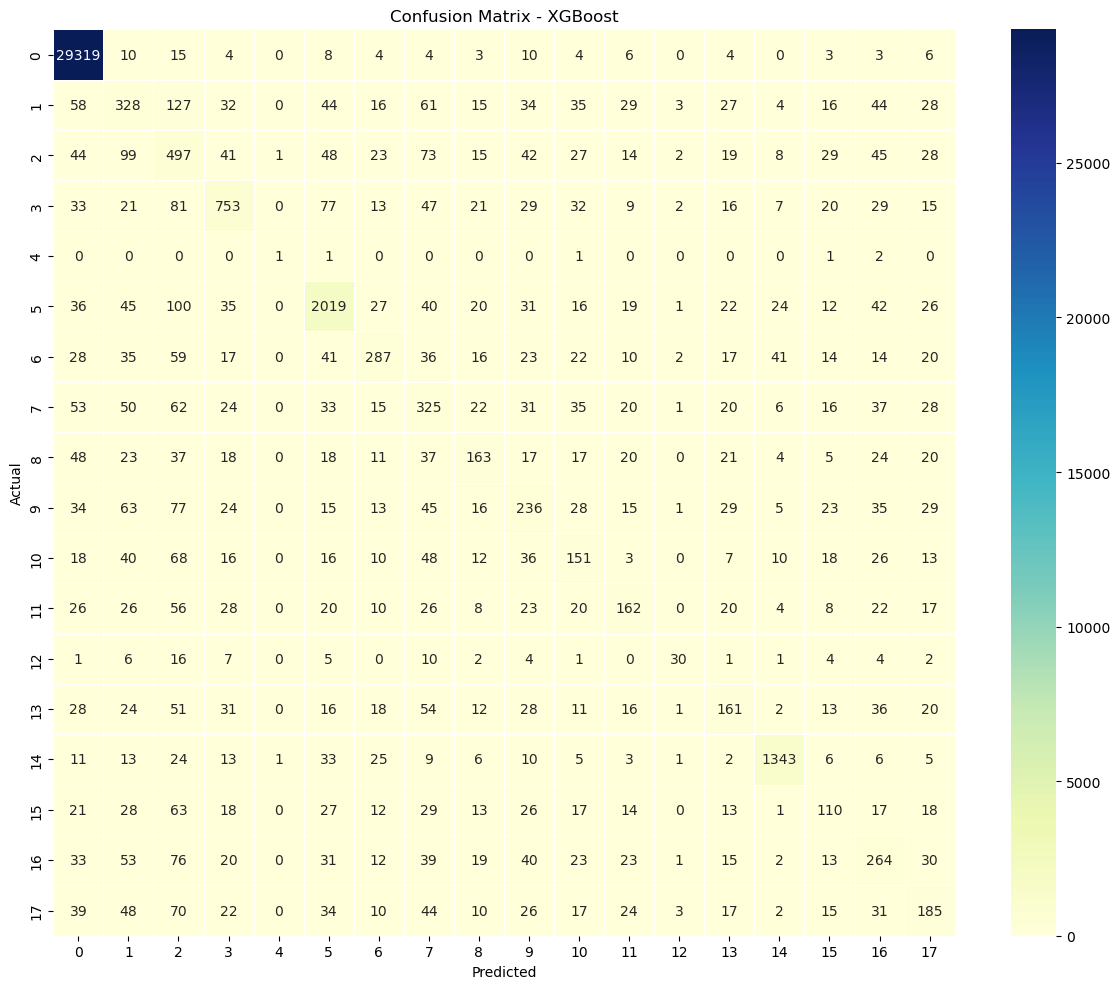

C:\Users\Administrator\AppData\Local\Temp\35\ipykernel_9288\3747745725.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, y='Feature', x='Importance', palette='magma')


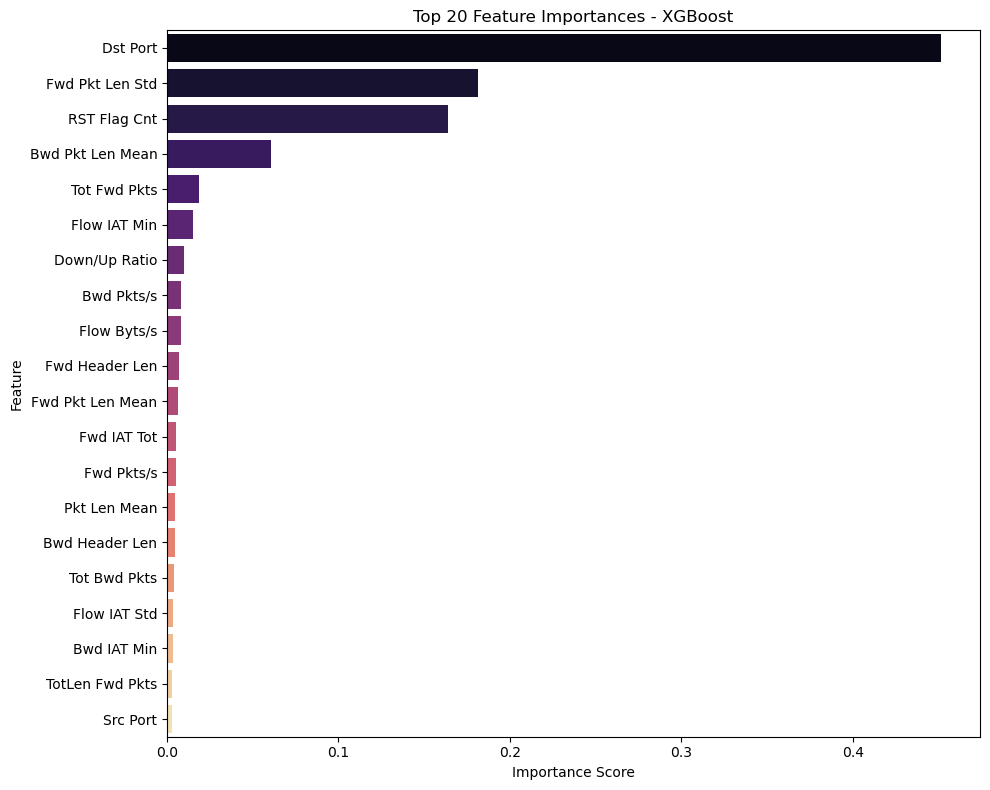

In [3]:
# TASK 06C: XGBOOST CONFUSION MATRIX + FEATURE IMPORTANCE VISUALIZATION

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Load test data and model
X_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_test.csv")
y_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_test.csv").squeeze()
xgb_model = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\xgboost_model.pkl")

# Predict
y_pred = xgb_model.predict(X_test)

# === 1. CONFUSION MATRIX HEATMAP ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === 2. FEATURE IMPORTANCE PLOT ===
importances = xgb_model.feature_importances_
feature_names = X_test.columns

# Build DataFrame of feature importances
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(data=feat_imp_df, y='Feature', x='Importance', palette='magma')
plt.title("Top 20 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
